In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# dectect outliers
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [59]:
df = pd.read_csv("../data/brfss/brfss_agg.csv", index_col=0)
print(df)


       state    age     sex  year        bmi
0          1  18-24  female  1993  21.704250
1          1  18-24  female  1994  23.100608
2          1  18-24  female  1995  23.313510
3          1  18-24  female  1996  24.502406
4          1  18-24  female  1997  23.347746
...      ...    ...     ...   ...        ...
38849     56    80+    male  2017  27.069832
38850     56    80+    male  2018  26.646026
38851     56    80+    male  2019  26.365848
38852     56    80+    male  2020  26.726692
38853     56    80+    male  2021  26.220133

[37739 rows x 5 columns]


[21.7042503  23.10060778 23.31351043 ... 26.36584752 26.7266922
 26.22013311]


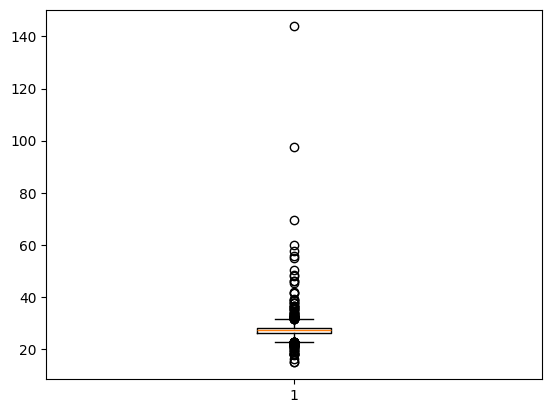

In [54]:
bmi = np.asarray(df['bmi'])
bmi = bmi[~np.isnan(bmi)]
print(bmi)
plt.boxplot(bmi)
plt.show()

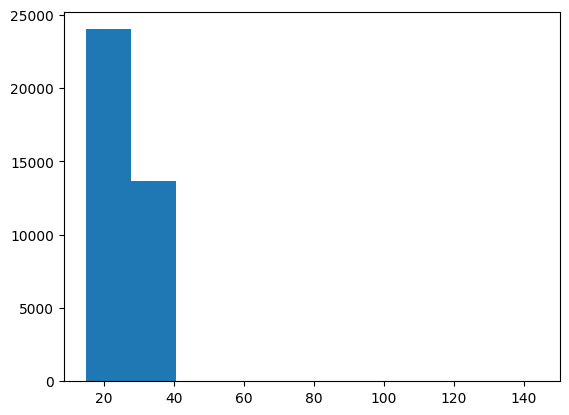

In [55]:
plt.hist(bmi)
plt.show()

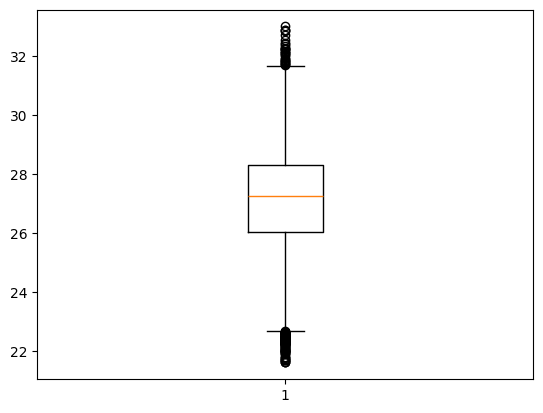

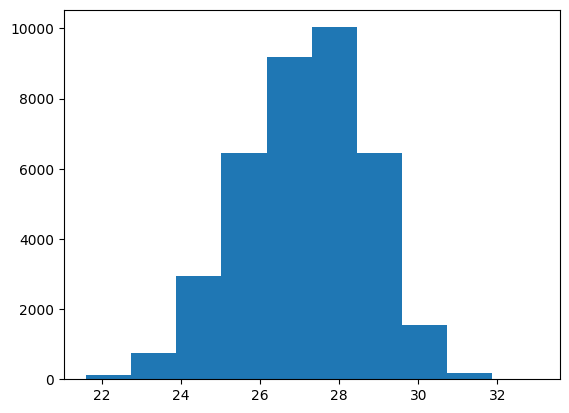

In [56]:
# no outlier plots 
bmi = bmi[~is_outlier(bmi)]

plt.boxplot(bmi)
plt.show()

plt.hist(bmi)
plt.show()

       state    age     sex  year        bmi
28         1  18-24  female  2021  27.504586
57         1  18-24    male  2021  26.219009
86         1  25-29  female  2021  29.944310
115        1  25-29    male  2021  27.866660
144        1  30-34  female  2021  30.826122
...      ...    ...     ...   ...        ...
38741     56  70-74    male  2021  28.291884
38769     56  75-79  female  2021  27.164538
38797     56  75-79    male  2021  28.020595
38825     56    80+  female  2021  25.220550
38853     56    80+    male  2021  26.220133

[1274 rows x 5 columns]


/var/folders/1z/wn6shwbs4_9gcwtsrgz8v5vc0000gn/T/ipykernel_14235/3307044255.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


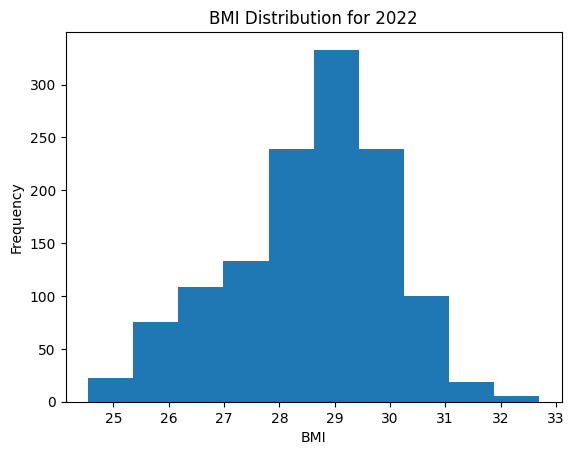

In [57]:
# Filter the DataFrame for the year 2022
df_2021 = df.loc[df['year'] == 2021]
print(df_2021)
# Extract the 'bmi' column
bmi_2021 = df_2021['bmi']

# Filter out outliers
bmi_2021_filtered = bmi_2021[~is_outlier(bmi_2021)]

# Plot the histogram
plt.hist(bmi_2021)
plt.title('BMI Distribution for 2022')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()